In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
dataset = load_breast_cancer() # load all the data
print(dataset.keys()) # lists the contents of the dataset
print(dataset.data.shape) # shape of the X matrix

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(569, 30)


In [4]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

# Question 1

<function matplotlib.pyplot.show(close=None, block=None)>

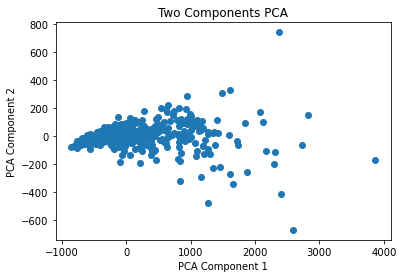

In [4]:
trans_data = PCA(n_components=2).fit_transform(dataset['data'])

plt.scatter(trans_data[:,0], trans_data[:,1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Two Components PCA')
plt.show

# Qustion 2 

I try two ways for this question, one follows the given hint but the other makes more sensen to me and easier to understand.

<function matplotlib.pyplot.show(close=None, block=None)>

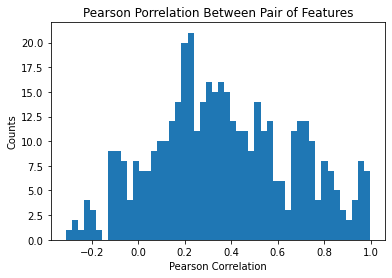

In [5]:
features = []
n = 0
while n < len(dataset.data[1]):
    feature = []
    for i in range(len(dataset.data)):
        feature.append(dataset.data[i][n])
    n = n+1
    features.append(feature)

rela = []
for i in range(len(features)):
    n = i+1
    while n < len(features):
        relation = np.corrcoef(features[i],features[n])
        rela.append(relation[0][1])
        n=n+1
        
plt.hist(rela,bins = 50)
plt.xlabel('Pearson Correlation')
plt.ylabel('Counts')
plt.title('Pearson Correlation Between Pair of Features')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

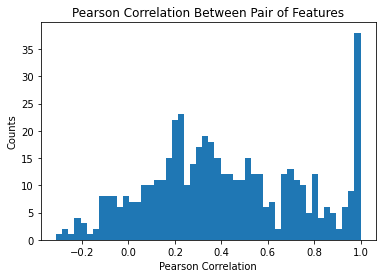

In [10]:
matrix = np.corrcoef(dataset.data, rowvar = False)
lower_diagonal = np.tril(matrix, k = 1)
coef = lower_diagonal.flatten()
coef = coef[coef != 0]
plt.hist(coef, bins = 50)
plt.xlabel('Pearson Correlation')
plt.ylabel('Counts')
plt.title('Pearson Correlation Between Pair of Features')
plt.show

# Question 3

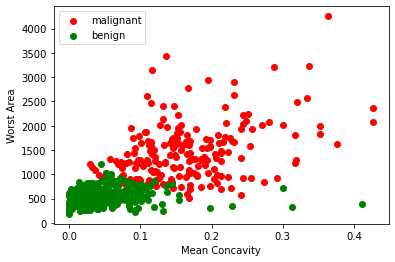

In [9]:
index1 = np.where(dataset['feature_names'] == 'mean concavity')
index2 = np.where(dataset['feature_names'] == 'worst area')

index1 = index1[0][0]
index2 = index2[0][0]

mean_concavity = dataset.data[:, index1]
worst_area = dataset.data[:, index2]

mean_concavity_zero = []
mean_concavity_one = []
worst_area_zero = []
worst_area_one = []

for i in range(len(dataset.target)):
    if dataset.target[i] == 0:
        mean_concavity_zero.append(mean_concavity[i])
        worst_area_zero.append(worst_area[i])
    else:
        mean_concavity_one.append(mean_concavity[i])
        worst_area_one.append(worst_area[i])
        
        
l1 = plt.scatter(mean_concavity_zero, worst_area_zero, color='r')
l2 = plt.scatter(mean_concavity_one, worst_area_one, color='g')
plt.legend(handles=[l1,l2],labels=['malignant','benign'],loc='best')
plt.xlabel('Mean Concavity')
plt.ylabel('Worst Area')
plt.show()

# Question 4

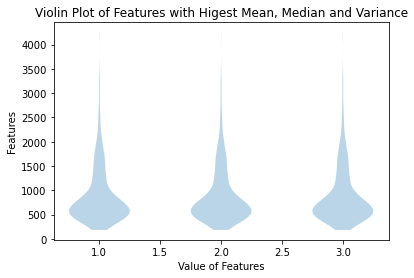

In [12]:
features = []
n = 0
while n < len(dataset.data[1]):
    feature = []
    for i in range(len(dataset.data)):
        feature.append(dataset.data[i][n])
    n = n+1
    features.append(feature)  
    
mean_list = []
median_list = []
variance_list = []

for i in range(len(features)):
    mean_list.append(np.mean(features[i]))
    median_list.append(np.median(features[i]))
    variance_list.append(np.std(features[i]))
    
maxMean = np.amax(mean_list)
maxMedian = np.amax(median_list)
maxVariance = np.amax(variance_list)

index1 = np.where(mean_list == maxMean)[0][0]
index2 = np.where(median_list == maxMedian)[0][0]
index3 = np.where(variance_list == maxVariance)[0][0]


highest_mean_feature = features[index1]
highest_median_feature = features[index2]
highest_variance_feature = features[index3]

data_to_plot = [features[index1], features[index2], features[index3]]

plt.violinplot(data_to_plot, showextrema=False)
plt.xlabel('Value of Features')
plt.ylabel('Features')
plt.title('Violin Plot of Features with Higest Mean, Median and Variance')
plt.show()

# Question 5

In [179]:
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2, shuffle = False)

logisticRegr = LogisticRegression(max_iter=1e4)
logisticRegr.fit(x_train, y_train)

# the out-of-sample classification accuracy
score = logisticRegr.score(x_test, y_test)
print(score)

# get the number of iterations needed for convergence
print(logisticRegr.n_iter_)

0.9298245614035088
[1476]


The out-of-sample classification accuracy is 92.98%, and it takes 1476 iterations for the model to converge. 

# Question 6

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2, shuffle = False)
model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(x_train, y_train)

# the out-of-sample classification accuracy
score = model.score(x_test, y_test)
print(score)

# get the number of iterations needed for convergence
print(model.named_steps['logisticregression'].n_iter_)

0.9824561403508771
[30]


In [ ]:
The out-of-sample classification accuracy is 98.25%, and it takes 30 iterations for the model to converge. 

# Question 7

<function matplotlib.pyplot.show(close=None, block=None)>

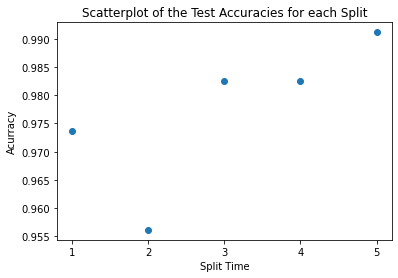

In [18]:
kf = KFold(n_splits = 5, shuffle = False)
model = make_pipeline(StandardScaler(), LogisticRegression())

X = dataset.data
y = dataset.target
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)   
    acc_score.append(acc)

number_of_split = ['1', '2', '3', '4', '5']
plt.scatter(number_of_split, acc_score)
plt.xlabel('Split Time')
plt.ylabel('Acurracy')
plt.title('Scatterplot of the Test Accuracies for each Split')
plt.show

# Question 8

<function matplotlib.pyplot.show(close=None, block=None)>

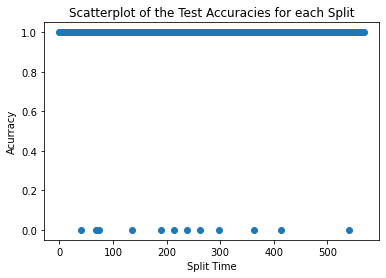

In [21]:
model = make_pipeline(StandardScaler(), LogisticRegression())
loo = LeaveOneOut()

X = dataset.data
y = dataset.target
acc_score = []
counts = []

n = 0
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)   
    acc_score.append(acc)
    
    counts.append(n)
    n = n+1
    
plt.scatter(counts, acc_score)
plt.xlabel('Split Time')
plt.ylabel('Acurracy')
plt.title('Scatterplot of the Test Accuracies for each Split')
plt.show